In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

In [7]:
X = iris.data[:,2:]
y = iris.target

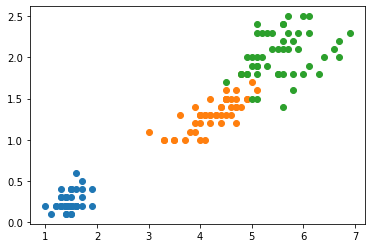

In [6]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_cfl = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt_cfl.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [18]:
def plot_decision_boundary(model,axis):
    """
    model：模型
    axis:坐标轴的范围；0123对应的就是x轴和y轴的范围
    """
    # 使用linspace将x轴，y轴划分成无数的小点
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)

<ipython-input-18-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


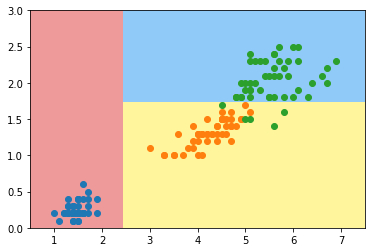

In [19]:
plot_decision_boundary(dt_cfl, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

# 信息熵

二分类的信息熵函数

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

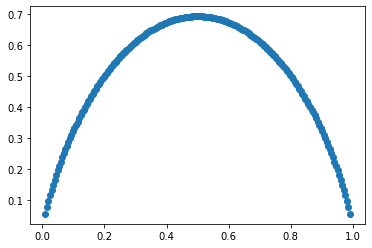

In [15]:
x = np.linspace(0.01,0.99,200)
plt.scatter(x,entropy(x))

# 使用信息熵寻找最优划分

模拟使用信息熵进行划分

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [26]:
def spilt(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [27]:
from collections import Counter
from math import log
def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p*log(p)
    return res
def try_spilt(X, y):
    best_entropy = float('inf')
    best_d, best_v = -1,-1
    for d in range(X.shape[1]):
        # 遍历每一个维度
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            # 计算每两个值之间的信息熵，所以从1开始
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                # 将两个数据点的平均值作为切分点
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d]) / 2
                X_l, X_r, y_l, y_r = spilt(X, y, d, v)
                # 分别计算两部分的信息熵然后相加
                e = entropy(y_l) + entropy(y_r)
                if e<best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

In [28]:
best_entropy, best_d, best_v = try_spilt(X, y)
print(best_entropy)
print(best_d)
print(best_v)

0.6931471805599453
0
2.45


In [32]:
X1_l, X1_r, y1_l, y1_r = spilt(X, y ,best_d, best_v)

In [33]:
entropy(y1_l)

0.0

In [34]:
entropy(y1_r)

0.6931471805599453

In [35]:
best_entropy2,best_d2,best_v2 = try_spilt(X1_r,y1_r)

In [36]:
print(best_entropy2)
print(best_d2)
print(best_v2)
# 在第一个维度1.75的位置进行划分，划分的结果的信息熵为0.41左右

0.4132278899361904
1
1.75


In [37]:
X2_l, x2_r, y2_l, y2_r = spilt(X1_r,y1_r,best_d2,best_v2)

In [38]:
entropy(y2_l)

0.30849545083110386

In [39]:
entropy(y2_r)

0.10473243910508653

# 基尼系数

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_cfl = DecisionTreeClassifier(max_depth=2,criterion="gini")
dt_cfl.fit(X,y)

DecisionTreeClassifier(max_depth=2)

<ipython-input-18-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


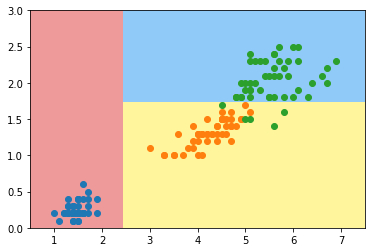

In [43]:
plot_decision_boundary(dt_cfl, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

# 模拟使用基尼系数进行划分

In [44]:
from collections import Counter
from math import log

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p ** 2
    return res

def try_spilt(X, y):
    best_g = float('inf')
    best_d, best_v = -1,-1
    for d in range(X.shape[1]):
        # 遍历每一个维度
        sorted_index = np.argsort(X[:,d]) #在每一个特征维度上排序
        for i in range(1,len(X)):
            # 计算每两个值之间的信息熵，所以从1开始
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                # 将两个数据点的平均值作为切分点
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d]) / 2
                X_l, X_r, y_l, y_r = spilt(X, y, d, v)
                # 分别计算两部分的基尼系数然后相加
                e = gini(y_l) + gini(y_r)
                if e<best_g:
                    best_g, best_d, best_v = e, d, v
    return best_g, best_d, best_v

In [45]:
best_g, best_d, best_v = try_spilt(X, y)
print(best_g)
print(best_d)
print(best_v)

0.5
0
2.45


In [46]:
X1_l, X1_r, y1_l, y1_r = spilt(X, y ,best_d, best_v)

In [47]:
gini(y1_l)

0.0

In [48]:
gini(y1_r)

0.5

In [49]:
best_g2, best_d2, best_v2 = try_spilt(X1_r, y1_r)
print(best_g2)
print(best_d2)
print(best_v2)

0.2105714900645938
1
1.75


In [50]:
X2_l, x2_r, y2_l, y2_r = spilt(X1_r,y1_r,best_d2,best_v2)

In [51]:
gini(y2_l)

0.1680384087791495

In [52]:
gini(y2_r)

0.04253308128544431

# CRAT 与决策树中的超参数

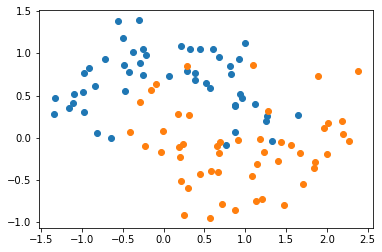

In [53]:
from sklearn import datasets
X, y = datasets.make_moons(noise=0.25, random_state=666)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier()

<ipython-input-18-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


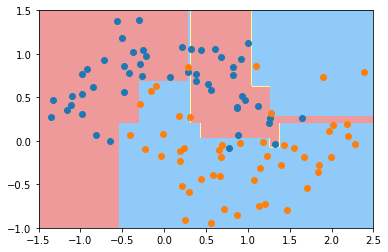

In [55]:
# 决策边界非常不规则，产生了过拟合
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [56]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X,y)

DecisionTreeClassifier(max_depth=2)

<ipython-input-18-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


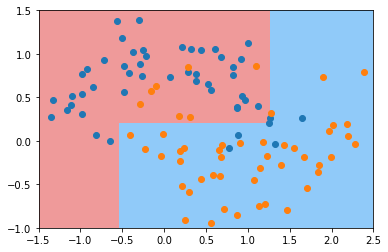

In [58]:
plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
# 很显然，现在这个样子相比上面的形状不在有过拟合，有了非常清晰的边界（不会针对某几个特别的样本点进行特殊的变化）

这种情况下，很有可能存在欠拟合，所以我们要对这些参数进行比较精细的调整，让他既不过拟合也不欠拟合

In [59]:
# min_samples_split:对于一个结点来说，至少要有多少个样本数据，我们才对他继续进行拆分下去
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X,y)

DecisionTreeClassifier(min_samples_split=10)

<ipython-input-18-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


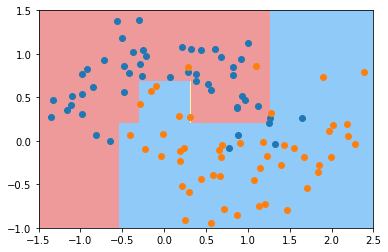

In [60]:
plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

<ipython-input-18-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


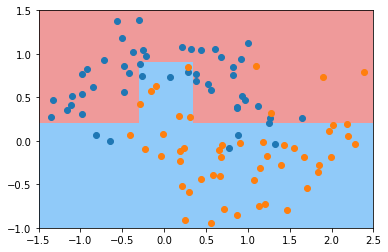

In [61]:
# 对于叶子节点来说，至少要有几个样本
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)
plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

<ipython-input-18-1e077539a7da>:16: UserWarning: The following kwargs were not used by contour: 'linspace'
  plt.contourf(x0,x1,zz,linspace=5,cmap=custom_cmap)


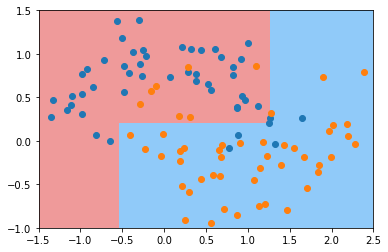

In [62]:
# 决策树最多的叶子节点
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(X, y)
plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

# 决策树解决回归问题

scikit-learn封装的决策树解决回归问题

In [63]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 666)

Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [66]:
dt_reg.score(X_test,y_test)

0.5762598890980446

In [67]:
# 在训练数据集上预测的准确率是百分之百的---过拟合
dt_reg.score(X_train, y_train)

1.0

# 决策树的局限性